Importing libraries

In [ ]:
import pandas as pd

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
import os
os._exit(00)

In [ ]:
import pandas as pd
import ydata_profiling
from ydata_profiling import ProfileReport

ModuleNotFoundError: ignored

Loading the dataset

In [ ]:
df = pd.read_csv("/content/SEntFiN-v1.1.csv")

In [ ]:
df.head()

,S No.,Title,Decisions,Words
0,1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8
1,2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8
2,3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8
3,4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7
4,5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8


Performing EDA using Pandas-profiling

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Generate the report
profile.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Cleaning 'Decisions' column as the values in this column are in JSON format and extracting the sentiment labels

In [ ]:
import pandas as pd
import json

# Function to extract sentiment labels from JSON format
def extract_sentiment(decisions):
    try:
        decisions_dict = json.loads(decisions.replace("'", "\""))
        # Assuming there is only one key in the JSON, get the sentiment label
        sentiment_label = next(iter(decisions_dict.values()))
        return sentiment_label
    except json.JSONDecodeError:
        return None

# Apply the function to the 'Decisions' column
df['Sentiment'] = df['Decisions'].apply(extract_sentiment)

# Drop the 'Decisions' column if needed
df = df.drop(columns=['Decisions'])

In [ ]:
# Display the cleaned DataFrame
df.head()

,S No.,Title,Words,Sentiment
0,1,SpiceJet to issue 6.4 crore warrants to promoters,8,neutral
1,2,MMTC Q2 net loss at Rs 10.4 crore,8,neutral
2,3,"Mid-cap funds can deliver more, stay put: Experts",8,positive
3,4,Mid caps now turn into market darlings,7,positive
4,5,"Market seeing patience, if not conviction: Pra...",8,neutral


Downloading the data after cleaning the 'Decisions' column

In [ ]:
df.to_csv('Data_aftercleaning_DecisionColumn.csv', index=False)

After removing missing values from the data, uploading the cleaned dataset

In [ ]:
df1 = pd.read_csv("/content/Cleaned_Stock_Headlines_Data.csv")

In [ ]:
df1.shape

(10739, 4)

Models to perform Sentiment Analysis

1. Naive Bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1['Title'], df1['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vec, y_train)

# Make predictions on the test set
predictions = naive_bayes.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.77

Confusion Matrix:
[[469  86 111]
 [ 54 492 117]
 [ 69  52 698]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.70      0.75       666
     neutral       0.78      0.74      0.76       663
    positive       0.75      0.85      0.80       819

    accuracy                           0.77      2148
   macro avg       0.78      0.77      0.77      2148
weighted avg       0.77      0.77      0.77      2148



2. Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1['Title'], df1['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_vec, y_train)

# Make predictions on the test set
predictions = random_forest.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.80

Confusion Matrix:
[[464 123  79]
 [ 28 563  72]
 [ 37  95 687]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.70      0.78       666
     neutral       0.72      0.85      0.78       663
    positive       0.82      0.84      0.83       819

    accuracy                           0.80      2148
   macro avg       0.81      0.79      0.80      2148
weighted avg       0.81      0.80      0.80      2148



3. Logistic Regression

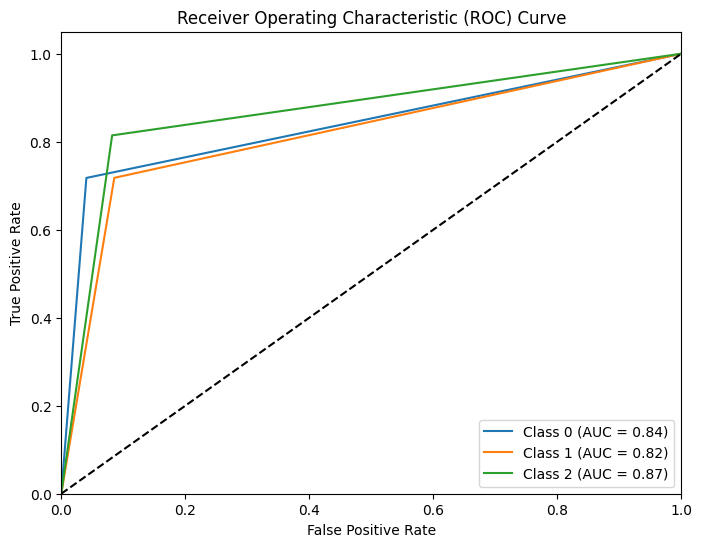

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize the labels
y_train_bin = label_binarize(y_train, classes=['negative', 'neutral', 'positive'])
y_test_bin = label_binarize(y_test, classes=['negative', 'neutral', 'positive'])

# Train the model for each class
models = {}
for i in range(3):  # assuming three classes
    model = LogisticRegression()
    model.fit(X_train, y_train_bin[:, i])
    models[i] = model

# Make predictions for each class
y_pred_bin = np.column_stack([model.predict(X_test) for model in models.values()])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


4. RNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, classification_report

# Data preprocessing
max_words = 1000
max_len = 20

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df1['Title'])
sequences = tokenizer.texts_to_sequences(df1['Title'])
X = pad_sequences(sequences, maxlen=max_len)
y = df1['Sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2}).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
model.add(LSTM(100))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Epoch 1/5
242/242 [==============================] - 19s 57ms/step - loss: 0.8598 - accuracy: 0.5976 - val_loss: 0.6069 - val_accuracy: 0.7593
Epoch 2/5
242/242 [==============================] - 8s 33ms/step - loss: 0.5444 - accuracy: 0.7903 - val_loss: 0.5736 - val_accuracy: 0.7709
Epoch 3/5
242/242 [==============================] - 6s 27ms/step - loss: 0.4869 - accuracy: 0.8070 - val_loss: 0.5854 - val_accuracy: 0.7674
Epoch 4/5
242/242 [==============================] - 5s 19ms/step - loss: 0.4596 - accuracy: 0.8212 - val_loss: 0.6237 - val_accuracy: 0.7442
Epoch 5/5
68/68 [==============================] - 1s 7ms/step
Accuracy: 0.7807262569832403
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.77       666
           1       0.71      0.81      0.76       663
           2       0.82      0.80      0.81       819

    accuracy                           0.78      2148
   macro avg       0.78      0.78      0.78

5. XG Boost

Accuracy: 0.8063314711359404
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.80       666
           1       0.72      0.84      0.77       663
           2       0.83      0.84      0.84       819

    accuracy                           0.81      2148
   macro avg       0.82      0.80      0.80      2148
weighted avg       0.82      0.81      0.81      2148



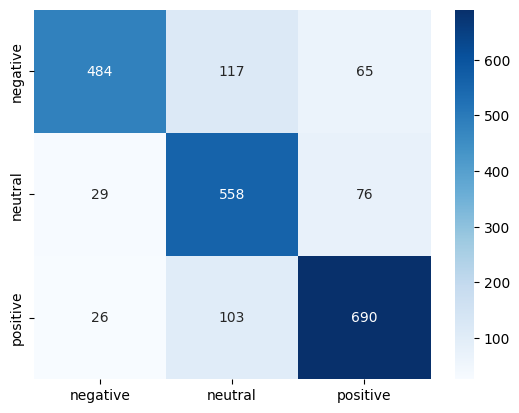

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Feature engineering: Convert text data into numerical format
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df1['Title']).toarray()

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df1['Sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
print("Classification Report:\n", class_report)


6. Natural Language Toolkit (NLTK)

In [ ]:
pip install nltk

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Function to perform sentiment analysis using NLTK
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)['compound']

    # Classify sentiment based on the compound score
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'Title' column
df1['Predicted_Sentiment'] = df1['Title'].apply(analyze_sentiment)

# Display the DataFrame with predicted sentiment
print(df1[['S No.', 'Title', 'Sentiment', 'Predicted_Sentiment']])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


       S No.                                              Title Sentiment  \
0          1  SpiceJet to issue 6.4 crore warrants to promoters   neutral   
1          2                  MMTC Q2 net loss at Rs 10.4 crore   neutral   
2          3  Mid-cap funds can deliver more, stay put: Experts  positive   
3          4             Mid caps now turn into market darlings  positive   
4          5  Market seeing patience, if not conviction: Pra...   neutral   
...      ...                                                ...       ...   
10734  10735       Negative on Chambal, Advanta: Mitesh Thacker  negative   
10735  10736     Small, Mid-cap stocks may emerge outperformers  positive   
10736  10737                      Rupee slips against US dollar  negative   
10737  10738                       Rupee weak against US dollar  negative   
10738  10739                Australia shares flat; energy drags   neutral   

      Predicted_Sentiment  
0                 neutral  
1                ne

Classification Report:
              precision    recall  f1-score   support

    negative       0.65      0.42      0.51      3134
     neutral       0.43      0.59      0.50      3442
    positive       0.54      0.53      0.53      4163

    accuracy                           0.52     10739
   macro avg       0.54      0.51      0.52     10739
weighted avg       0.54      0.52      0.52     10739



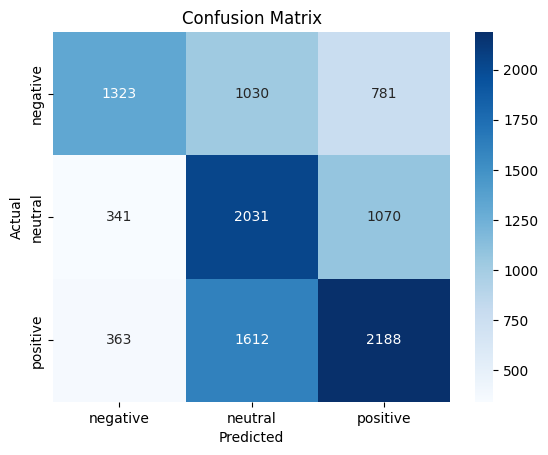

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'Sentiment' and 'Predicted_Sentiment' are categorical
# Convert them to strings to avoid potential issues
df1['Sentiment'] = df1['Sentiment'].astype(str)
df1['Predicted_Sentiment'] = df1['Predicted_Sentiment'].astype(str)

# Generate the classification report
report = classification_report(df1['Sentiment'], df1['Predicted_Sentiment'])

# Print the classification report
print("Classification Report:")
print(report)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(df1['Sentiment'], df1['Predicted_Sentiment'])

# Plot the confusion matrix with labels
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

def analyze_sentiment(title, num_words):
    # Combine title and number of words for sentiment analysis
    text = f"{title} {num_words}"

    # Initialize SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()

    # Calculate the compound sentiment score
    sentiment_score = sid.polarity_scores(text)['compound']

    # Classify sentiment based on the compound score
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Example usage:
title = "Why Chinese stocks leave US investors vulnerable"
num_words = 7
predicted_sentiment = analyze_sentiment(title, num_words)

# Print the result
print(f"Title: {title}\nNumber of Words: {num_words}\nPredicted Sentiment: {predicted_sentiment}")


Title: Why Chinese stocks leave US investors vulnerable
Number of Words: 7
Predicted Sentiment: negative


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
